train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.9113166666666667, 0.9135
train acc, test acc | 0.9312166666666667, 0.9309
train acc, test acc | 0.9435666666666667, 0.9422
train acc, test acc | 0.9500166666666666, 0.947
train acc, test acc | 0.9571833333333334, 0.9532
train acc, test acc | 0.9617333333333333, 0.9561
train acc, test acc | 0.9657, 0.9603
train acc, test acc | 0.9677333333333333, 0.9615
train acc, test acc | 0.9705666666666667, 0.9635
train acc, test acc | 0.9734833333333334, 0.9657
train acc, test acc | 0.9749166666666667, 0.9656
train acc, test acc | 0.9766833333333333, 0.9664
train acc, test acc | 0.9772666666666666, 0.9687
train acc, test acc | 0.9787833333333333, 0.9693
train acc, test acc | 0.98045, 0.9701
train acc, test acc | 0.9816333333333334, 0.9699
train acc, test acc | 0.9818833333333333, 0.9699
train acc, test acc | 0.98225, 0.9717
train acc, test acc | 0.9838333333333333, 0.9715
train acc, test acc | 0.9847666666666667, 0.9732
train

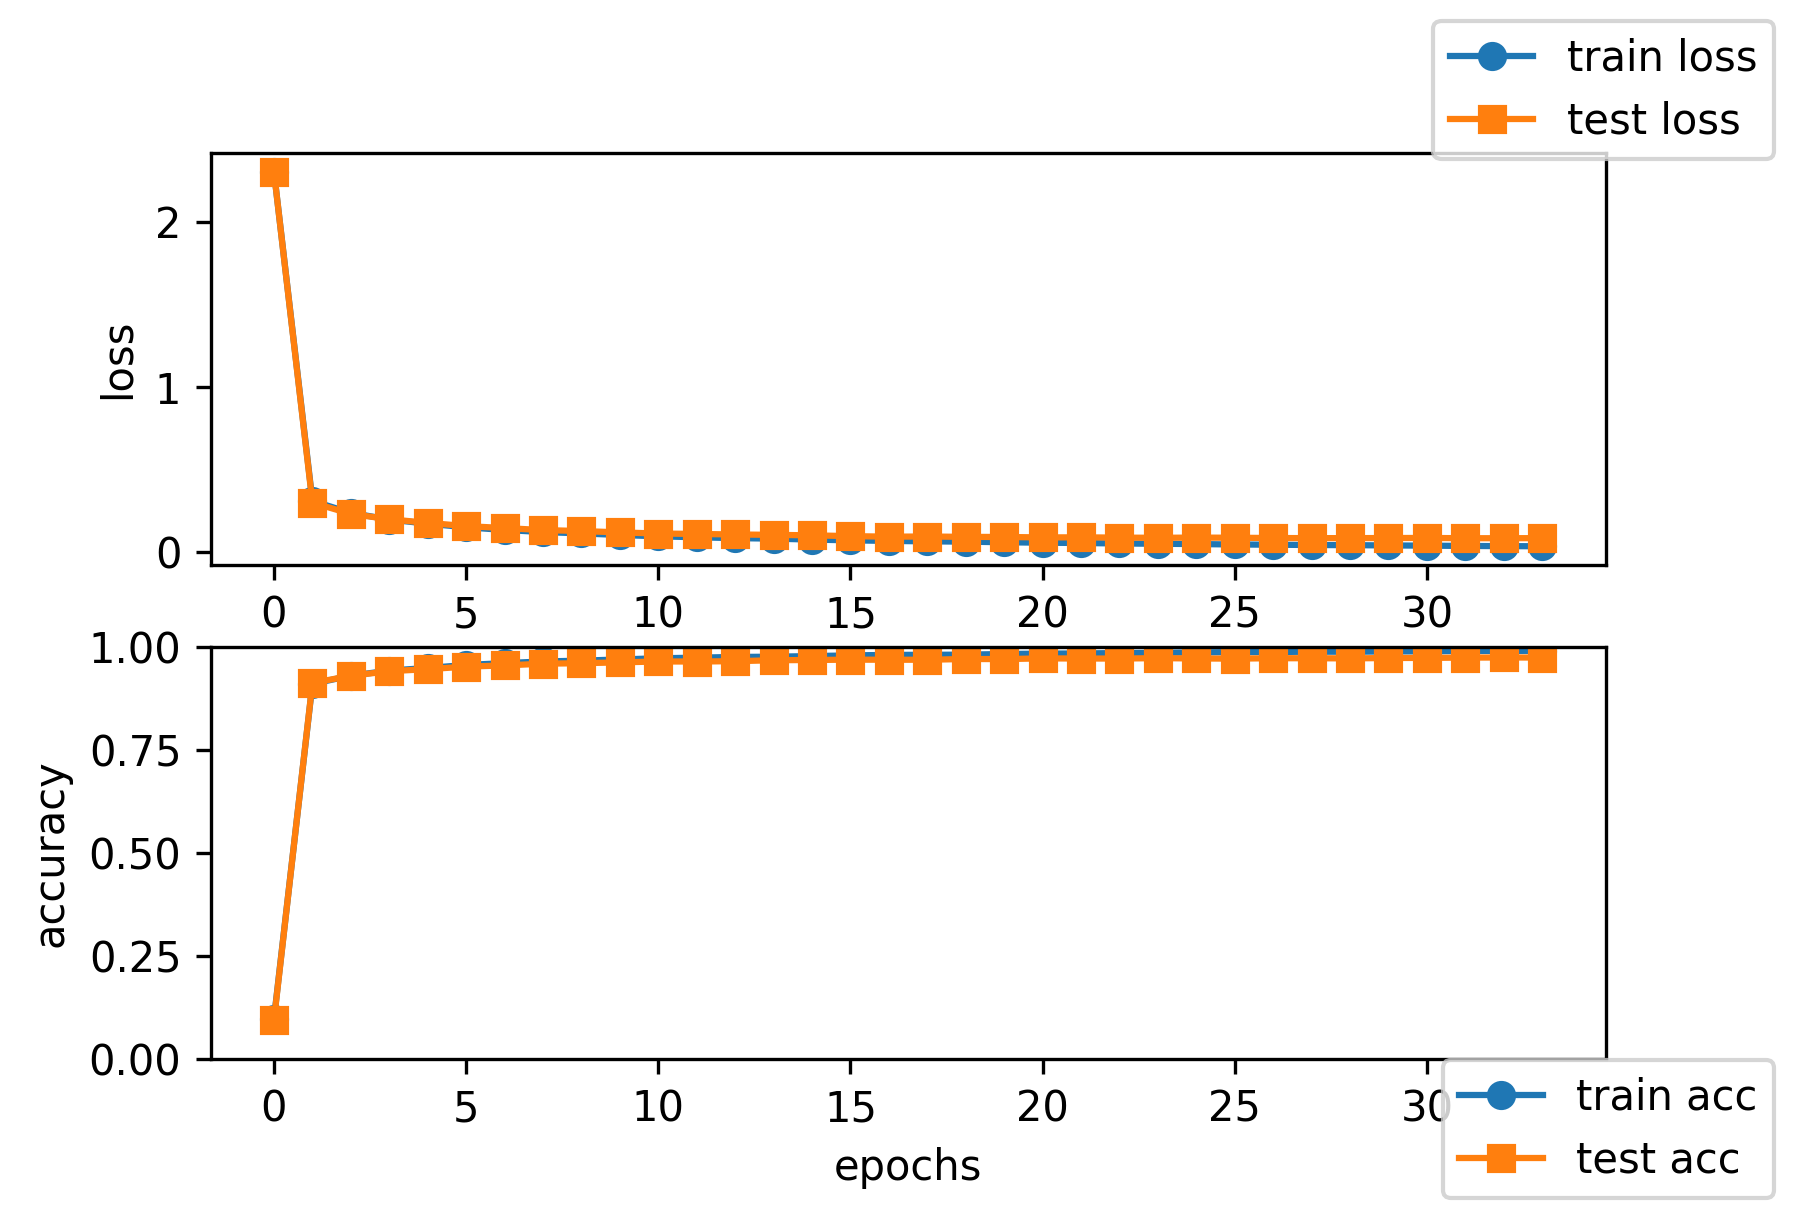

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from twolayernet import *
from common.optimizer import *

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 200
learning_rate = 0.1

train_loss_list = []
test_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
optimizer = Nesterov(lr=0.1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 勾配の計算
    grad = network.gradient(x_batch, t_batch)

    # パラメータの更新

    optimizer.update(network.params, grad)

    if i % iter_per_epoch == 0:
        train_loss_list.append(network.loss(x_train, t_train))
        test_loss_list.append(network.loss(x_test, t_test))
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画

fig = plt.figure(dpi=300)
ax1 = fig.add_subplot(2, 1, 1)
x = np.arange(len(train_loss_list))
ax1.plot(x, train_loss_list, label='train loss', marker='o')
ax1.plot(x, test_loss_list, label='test loss', marker='s')
# ax1.set_xlabel("epochs")
ax1.set_ylabel("loss")
ax1.figure.legend(loc='upper right')

ax2 = fig.add_subplot(2, 1, 2)
x = np.arange(len(train_acc_list))
ax2.plot(x, train_acc_list, label='train acc', marker='o')
ax2.plot(x, test_acc_list, label='test acc', marker='s')
ax2.set_xlabel("epochs")
ax2.set_ylabel("accuracy")
ax2.set_ylim(0, 1)
ax2.figure.legend(['train acc', 'test acc'], loc='lower right')
plt.show()

# 結果はFigure_1




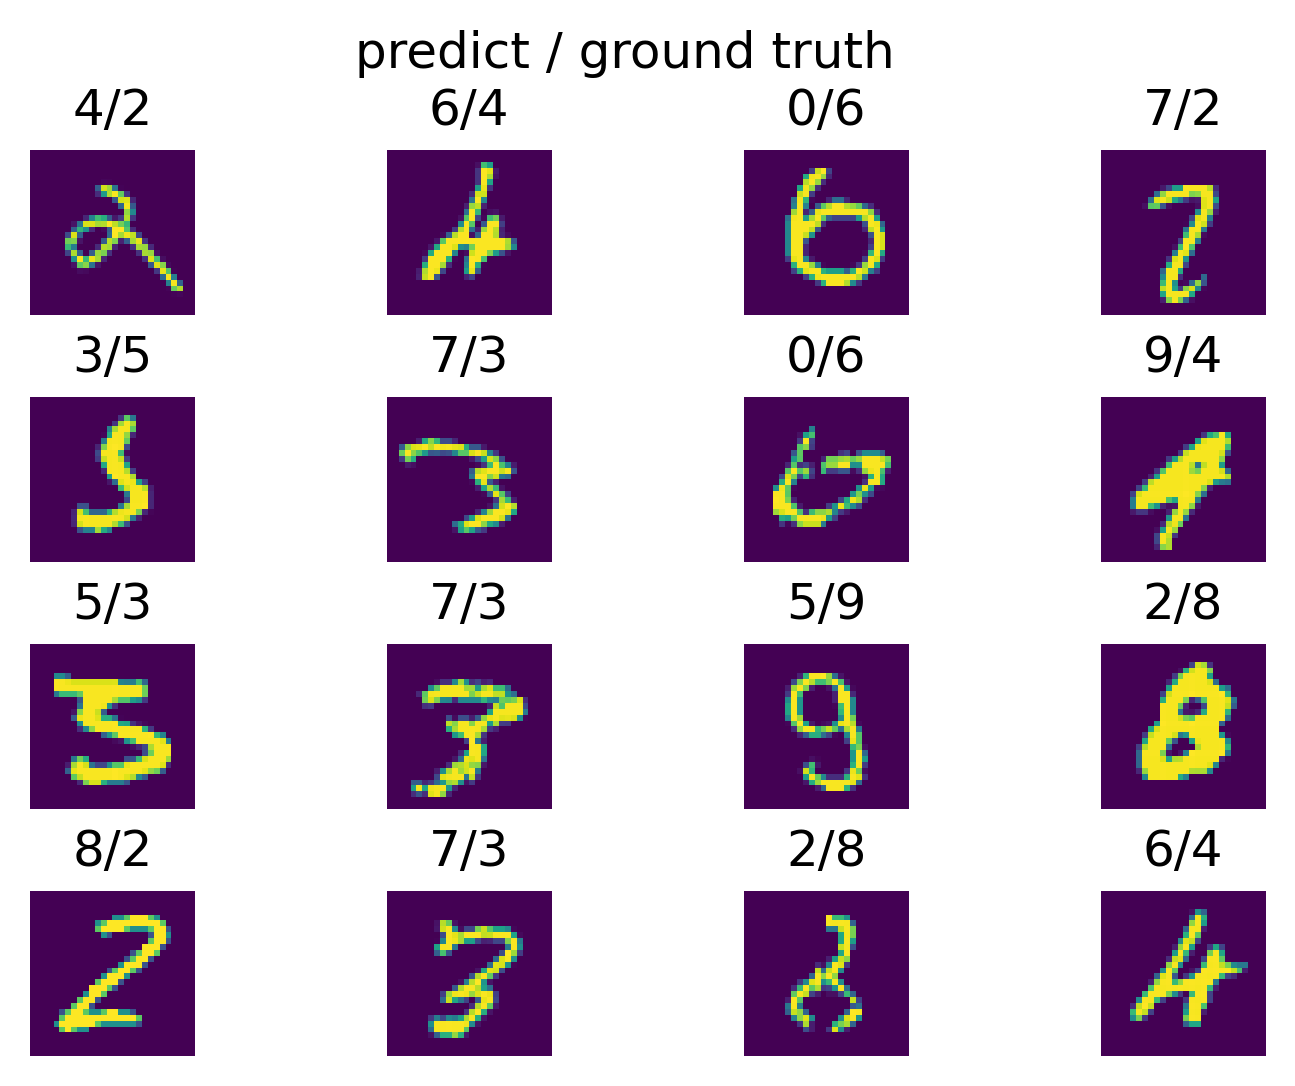

In [35]:
c = 0
fig = plt.figure(dpi=300)

fig.subplots_adjust(wspace=.1, hspace=.5)
for x,t in zip(x_test,t_test):
    y = np.argmax(network.predict(x))
    tt = np.argmax(t)
    if tt != y:
        ax = fig.add_subplot(4,4,c+1)
        ax.imshow(x.reshape(28,-1))
        ax.axis(False)
        ax.set_title(f'{y}/{tt}')
        c+=1
        if c >= 16:
            break
fig.suptitle('predict / ground truth')
plt.show()